<a href="https://colab.research.google.com/github/manyajsingh/MachineLearning/blob/Personal_ML/DT_RF_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Decision Tree Classifier
```



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('heart_failure_clinical_records_dataset (1).csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

[Text(0.3402777777777778, 0.95, 'x[11] <= 67.0\ngini = 0.424\nsamples = 239\nvalue = [166, 73]'),
 Text(0.1388888888888889, 0.85, 'x[2] <= 109.5\ngini = 0.208\nsamples = 51\nvalue = [6, 45]'),
 Text(0.05555555555555555, 0.75, 'x[8] <= 134.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.027777777777777776, 0.65, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.08333333333333333, 0.65, 'x[6] <= 205500.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.05555555555555555, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1111111111111111, 0.55, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.2222222222222222, 0.75, 'x[4] <= 72.5\ngini = 0.093\nsamples = 41\nvalue = [2, 39]'),
 Text(0.19444444444444445, 0.65, 'x[7] <= 0.7\ngini = 0.049\nsamples = 40\nvalue = [1, 39]'),
 Text(0.16666666666666666, 0.55, 'x[2] <= 594.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1388888888888889, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.19444444444444445, 0.4

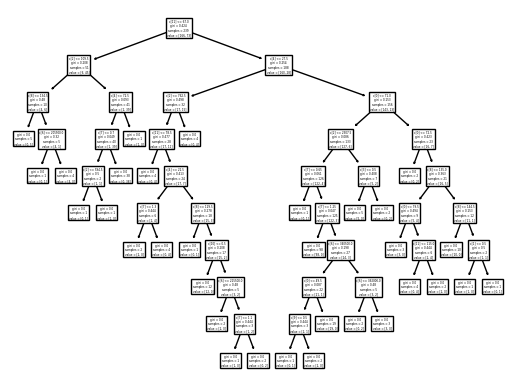

In [14]:
X=df.drop(columns='DEATH_EVENT', axis=1)
y=df['DEATH_EVENT']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=44)

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
clt=dt.fit(X_train, y_train)
tree.plot_tree(clt)

In [19]:
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))
print("\n")

dt1=DecisionTreeClassifier(max_depth=8)
dt1.fit(X_train, y_train)
print(dt1.score(X_train, y_train))
print(dt1.score(X_test, y_test))
print("\n")

from sklearn.model_selection import GridSearchCV
parameters={'max_depth':[3,4,5,6,7], 'max_leaf_nodes':[2,3,4,5,6]}
dt2=DecisionTreeClassifier()
dt2=GridSearchCV(dt2, parameters)
dt2.fit(X_train, y_train)
print(dt2.score(X_train, y_train))
print(dt2.score(X_test, y_test))

1.0
0.75


0.9916317991631799
0.7833333333333333


0.8744769874476988
0.8


In [20]:
dt2.best_params_ # best parameters

{'max_depth': 4, 'max_leaf_nodes': 5}

In [23]:
from sklearn.metrics import confusion_matrix
y_pred=dt2.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[33,  4],
       [ 8, 15]])

In [28]:
tn, fp, fn, tp= confusion_matrix(y_test, y_pred).ravel()
print(tn, tp, fn, fp)

33 15 8 4


In [29]:
y_pred_total=dt2.predict(X)
tn, fp, fn, tp=confusion_matrix(y, y_pred_total).ravel()
print(tn, fp, fn, tp)

193 10 32 64


In [30]:
df['DEATH_EVENT'].value_counts() # total 203 negative data (0) -> our model could predict 193 correctly
                                 # total 96 positive data (1) -> our model could predict 64 correctly

0    203
1     96
Name: DEATH_EVENT, dtype: int64



```
Decision Tree Regressor
```



In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('housing_data (1).csv')
pd.set_option('display.max_columns', 30)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
print(df.shape)
df.isnull().sum()

(21613, 21)


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [35]:
x=df.drop(columns=['price', 'id', 'date'])
y=df['price']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=1)

from sklearn.tree import DecisionTreeRegressor
rg=DecisionTreeRegressor()
rg.fit(x_train, y_train)

y_predict_test=rg.predict(x_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predict_test)

99866.29387723627

In [36]:
y_predict_train=rg.predict(x_train)
mean_absolute_error(y_train, y_predict_train)

832.0019829466587

In [38]:
from sklearn.model_selection import GridSearchCV
parameters={'max_depth':[6,7,8,9,10,12], 'max_leaf_nodes':[36,40,44,48,50,52], 'max_features':[10,12,14,16,18]}
rg1=DecisionTreeRegressor()
rg1=GridSearchCV(rg1, parameters)
rg1.fit(x_train, y_train)
rg1.best_params_

{'max_depth': 9, 'max_features': 16, 'max_leaf_nodes': 52}

In [42]:
y_predict_test=rg1.predict(x_test)
print(mean_absolute_error(y_test, y_predict_test))
y_predict_train=rg1.predict(x_train)
print(mean_absolute_error(y_train, y_predict_train))

108673.99326552298
97387.7043986185
